In [338]:
import pygad as pg
import numpy as np


In [339]:
sudoku = [
    [0, 9, 4, 0, 3, 0, 1, 0, 0],
    [8, 1, 2, 7, 0, 0, 0, 9, 6],
    [3, 0, 0, 1, 9, 0, 0, 0, 0],
    [0, 3, 0, 9, 0, 4, 6, 0, 0],
    [0, 0, 8, 6, 1, 3, 0, 4, 9],
    [0, 0, 6, 2, 0, 0, 0, 0, 1],
    [4, 0, 3, 5, 0, 0, 0, 0, 8],
    [5, 0, 0, 0, 2, 0, 7, 0, 0],
    [0, 6, 0, 0, 0, 8, 4, 1, 5]
]


In [340]:
zeros = 0
for row in sudoku:
    for number in row:
        if number == 0:
            zeros += 1

print(zeros)


43


In [341]:
gene_space = {"low": 1, "high": 9, "step": 1}
num_genes = zeros


In [342]:
def fitness_func(solution, solution_idx):
    solved_sudoku = []
    i = 0
    for row in sudoku:
        solved_row = []
        for number in row:
            if number == 0:
                solved_row.append(solution[i])
                i += 1
            else:
                solved_row.append(number)
        solved_sudoku.append(solved_row)

    good_rows, good_cols, good_squares = 0, 0, 0

    squares = [[], [], [],
               [], [], [],
               [], [], []]

    for i in range(9):
        tmp_row = []
        tmp_col = []

        for j in range(9):
            tmp_row.append(solved_sudoku[i][j])
            tmp_col.append(solved_sudoku[j][i])
            if i in [0, 1, 2] and j in [0, 1, 2]:
                squares[0].append(solved_sudoku[i][j])
            elif i in [0, 1, 2] and j in [3, 4, 5]:
                squares[3].append(solved_sudoku[i][j])
            elif i in [0, 1, 2] and j in [6, 7, 8]:
                squares[6].append(solved_sudoku[i][j])
            elif i in [3, 4, 5] and j in [0, 1, 2]:
                squares[1].append(solved_sudoku[i][j])
            elif i in [3, 4, 5] and j in [3, 4, 5]:
                squares[4].append(solved_sudoku[i][j])
            elif i in [3, 4, 5] and j in [6, 7, 8]:
                squares[7].append(solved_sudoku[i][j])
            elif i in [6, 7, 8] and j in [0, 1, 2]:
                squares[2].append(solved_sudoku[i][j])
            elif i in [6, 7, 8] and j in [3, 4, 5]:
                squares[5].append(solved_sudoku[i][j])
            elif i in [6, 7, 8] and j in [6, 7, 8]:
                squares[8].append(solved_sudoku[i][j])

        if len(np.unique(tmp_row)) == 9:
            good_rows += 1
        if len(np.unique(tmp_col)) == 9:
            good_cols += 1

    for square in squares:
        if len(np.unique(square)) == 9:
            good_squares += 1

    return good_rows + good_cols + good_squares


In [343]:
def other_fitness(solution, solution_idx):
    solved_sudoku = []
    i = 0
    for row in sudoku:
        solved_row = []
        for number in row:
            if number == 0:
                solved_row.append(solution[i])
                i += 1
            else:
                solved_row.append(number)
        solved_sudoku.append(solved_row)
    
    def check_row(i):
        return len(np.unique(solved_sudoku[i])) == 9

    def check_col(i):
        tmp = []
        for j in range(9):
            tmp.append(solved_sudoku[j][i])
        return len(np.unique(tmp)) == 9
    
    good_numbers = 0
    for i in range(9):
        for j in range(9):
            if sudoku[i][j] == 0:
                if check_row(i) and check_col(j):
                    good_numbers += 1
    
    return good_numbers


In [344]:
sol_per_pop = 350
num_parents_mating = 175
num_generations = 500
keep_parents = 75
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 3


ga_instance = pg.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=other_fitness,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    # stop_criteria="reach_18"
    # parallel_processing=["process", 20]
)


In [345]:
ga_instance.run()


8


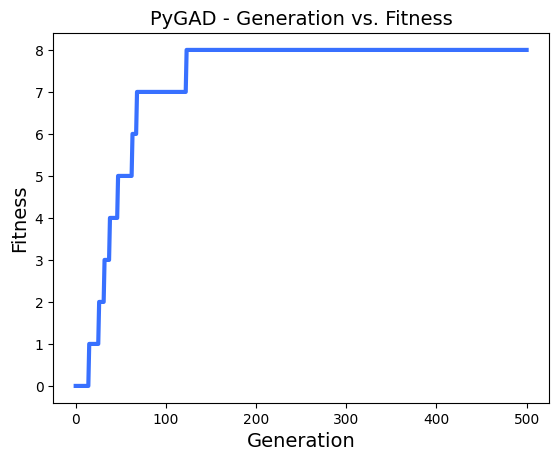


[5. 8. 2. 6. 7. 4. 5. 3. 8. 2. 7. 5. 6. 4. 8. 1. 5. 7. 2. 7. 2. 5. 8. 4.
 7. 6. 3. 1. 7. 6. 3. 8. 5. 5. 6. 4. 6. 8. 3. 1. 7. 3. 8.]


In [346]:
solution, solution_fitness, _ = ga_instance.best_solution()
print(solution_fitness)
ga_instance.plot_fitness()
print()
print(solution)